# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [75]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [76]:
# Load Data 
dataset = pd.read_csv("compresive_strength_concrete.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## Cement vs Concrete compressive strength

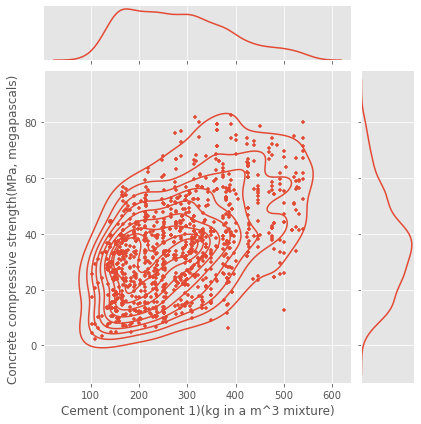

In [77]:
g = sns.jointplot(x='Cement (component 1)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Blast Furnace Slag vs Concrete compressive strength

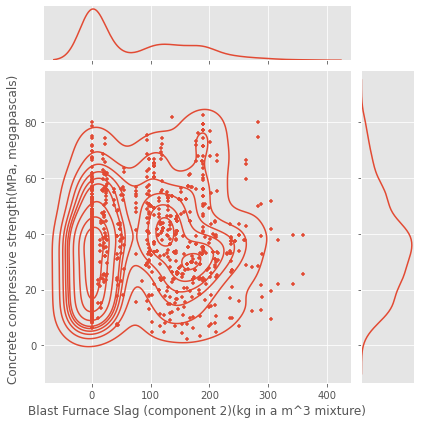

In [78]:
g = sns.jointplot(x='Blast Furnace Slag (component 2)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Fly Ash vs Concrete compressive strength

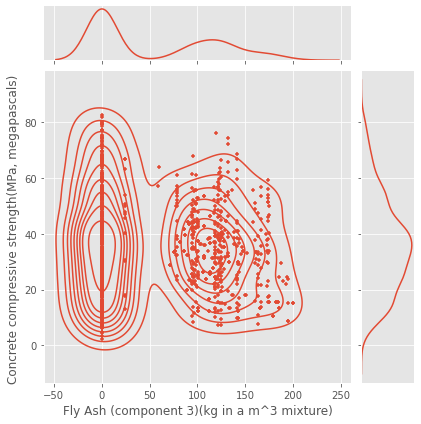

In [79]:
g = sns.jointplot(x='Fly Ash (component 3)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Water vs Concrete compressive strength

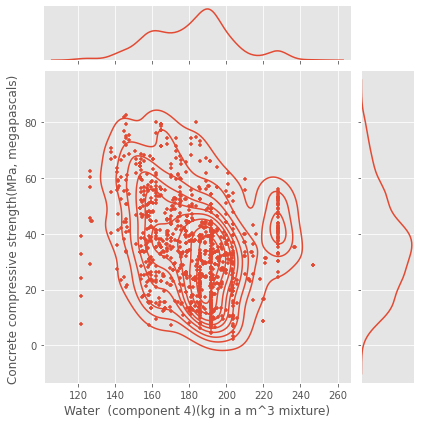

In [80]:
g = sns.jointplot(x='Water  (component 4)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Superplasticizer vs Concrete compressive strength

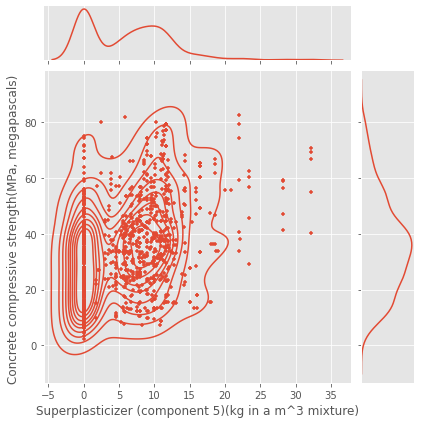

In [81]:
g = sns.jointplot(x='Superplasticizer (component 5)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Coarse Aggregater vs Concrete compressive strength

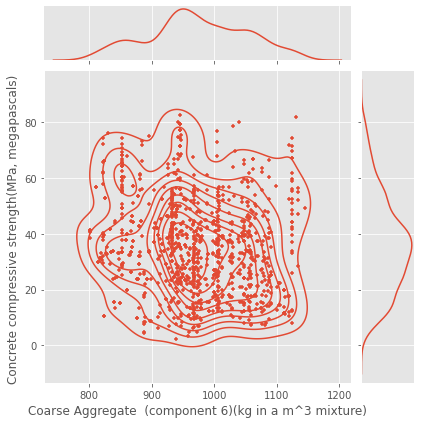

In [82]:
g = sns.jointplot(x='Coarse Aggregate  (component 6)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Fine Aggregate vs Concrete compressive strength

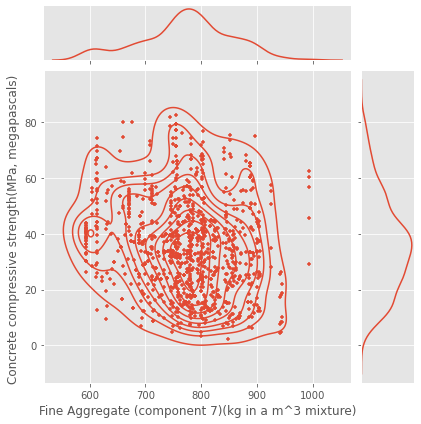

In [83]:
g = sns.jointplot(x='Fine Aggregate (component 7)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

## Age vs Concrete compressive strength

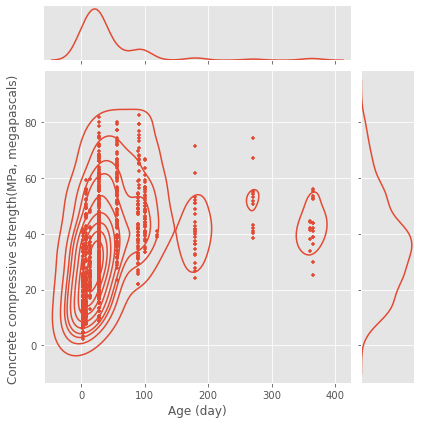

In [84]:
g = sns.jointplot(x='Age (day)',y ='Concrete compressive strength(MPa, megapascals) ',data=dataset,kind='kde')
g.plot_joint(plot.scatter,marker='+',s=10)

0 Cement (component 1)(kg in a m^3 mixture)
1 Blast Furnace Slag (component 2)(kg in a m^3 mixture)
2 Fly Ash (component 3)(kg in a m^3 mixture)
3 Water  (component 4)(kg in a m^3 mixture)
4 Superplasticizer (component 5)(kg in a m^3 mixture)
5 Coarse Aggregate  (component 6)(kg in a m^3 mixture)
6 Fine Aggregate (component 7)(kg in a m^3 mixture)
7 Age (day)
8 Concrete compressive strength(MPa, megapascals) 


LinAlgError: singular matrix

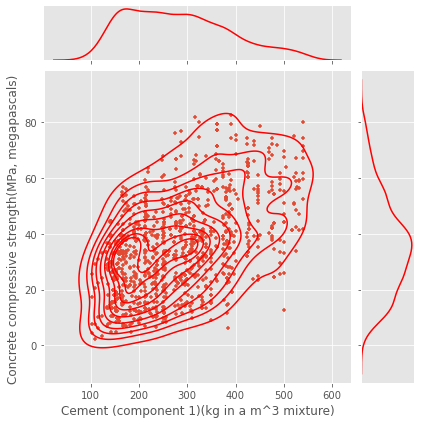

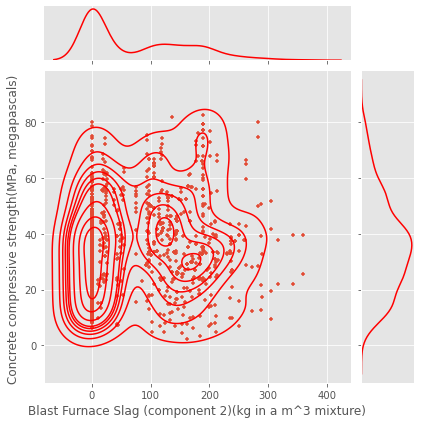

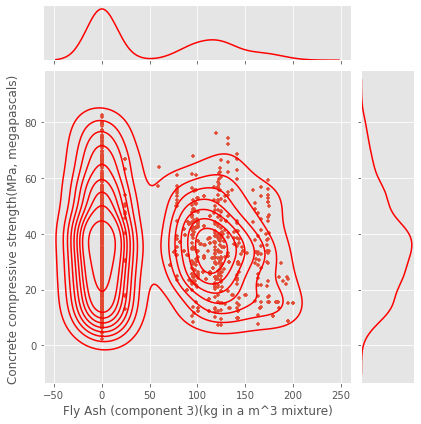

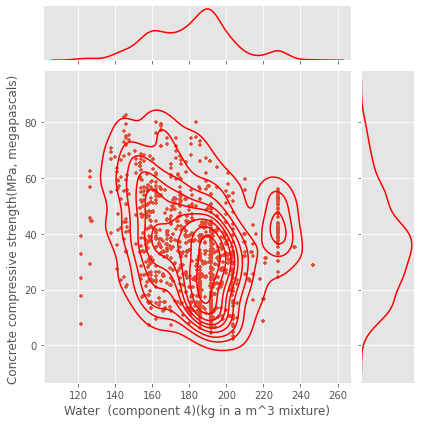

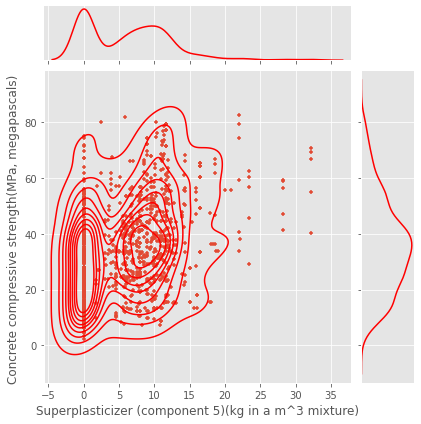

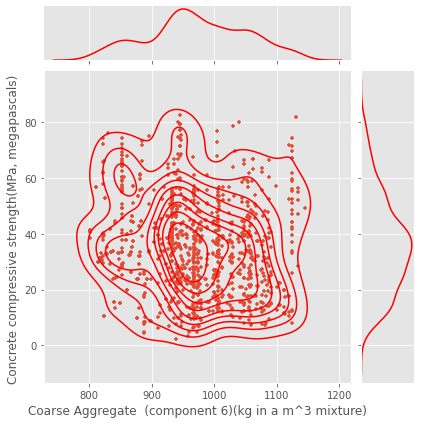

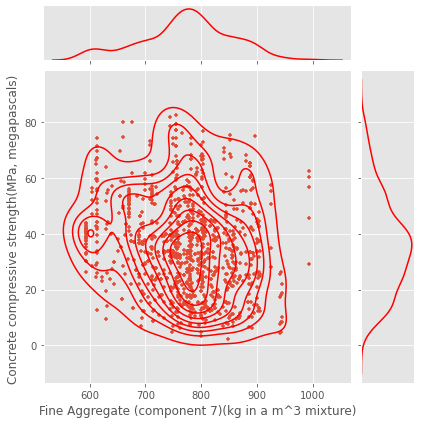

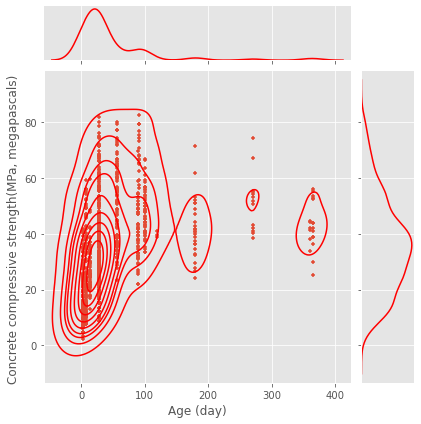

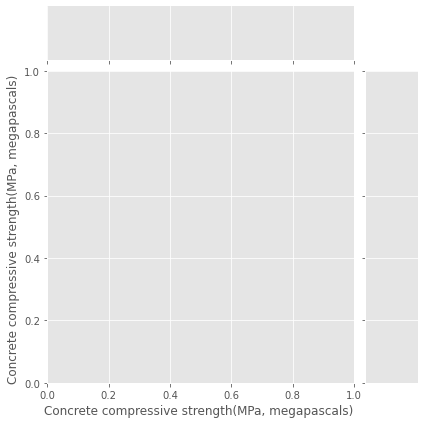

In [104]:

for row,col in enumerate(dataset[:]):
    print(row,col)
    g = sns.jointplot(x=col, y='Concrete compressive strength(MPa, megapascals) ' ,data=dataset,kind='kde',color='r')
    g.plot_joint(plot.scatter,marker='+',s=10)

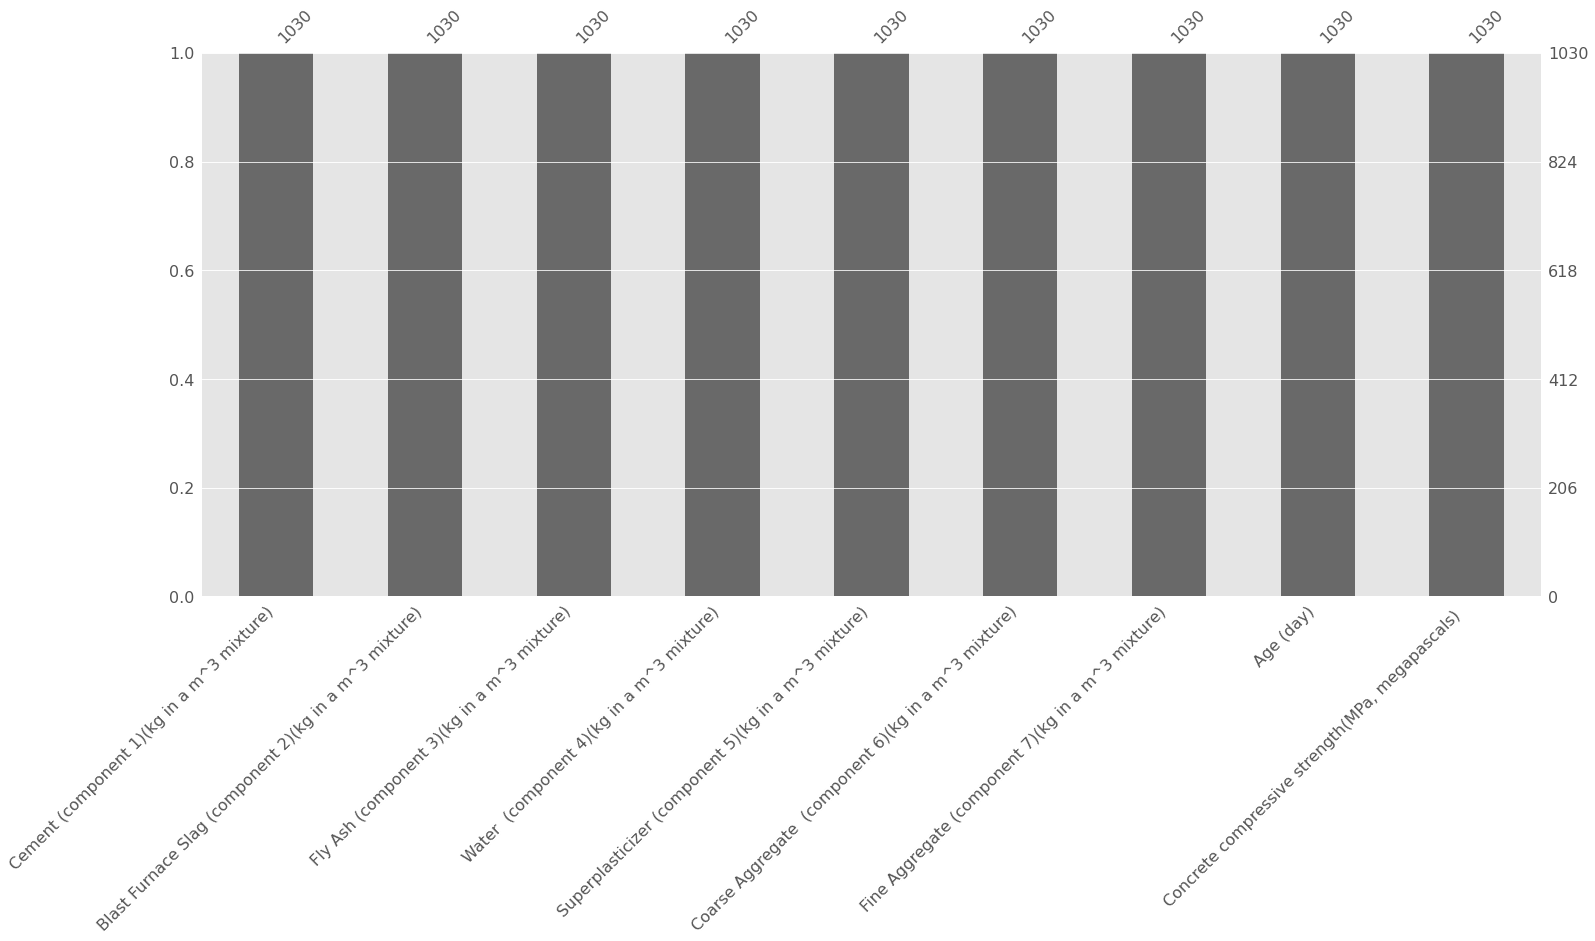

In [97]:
# visualizing missing values

msno.bar(dataset)
plt.show()

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


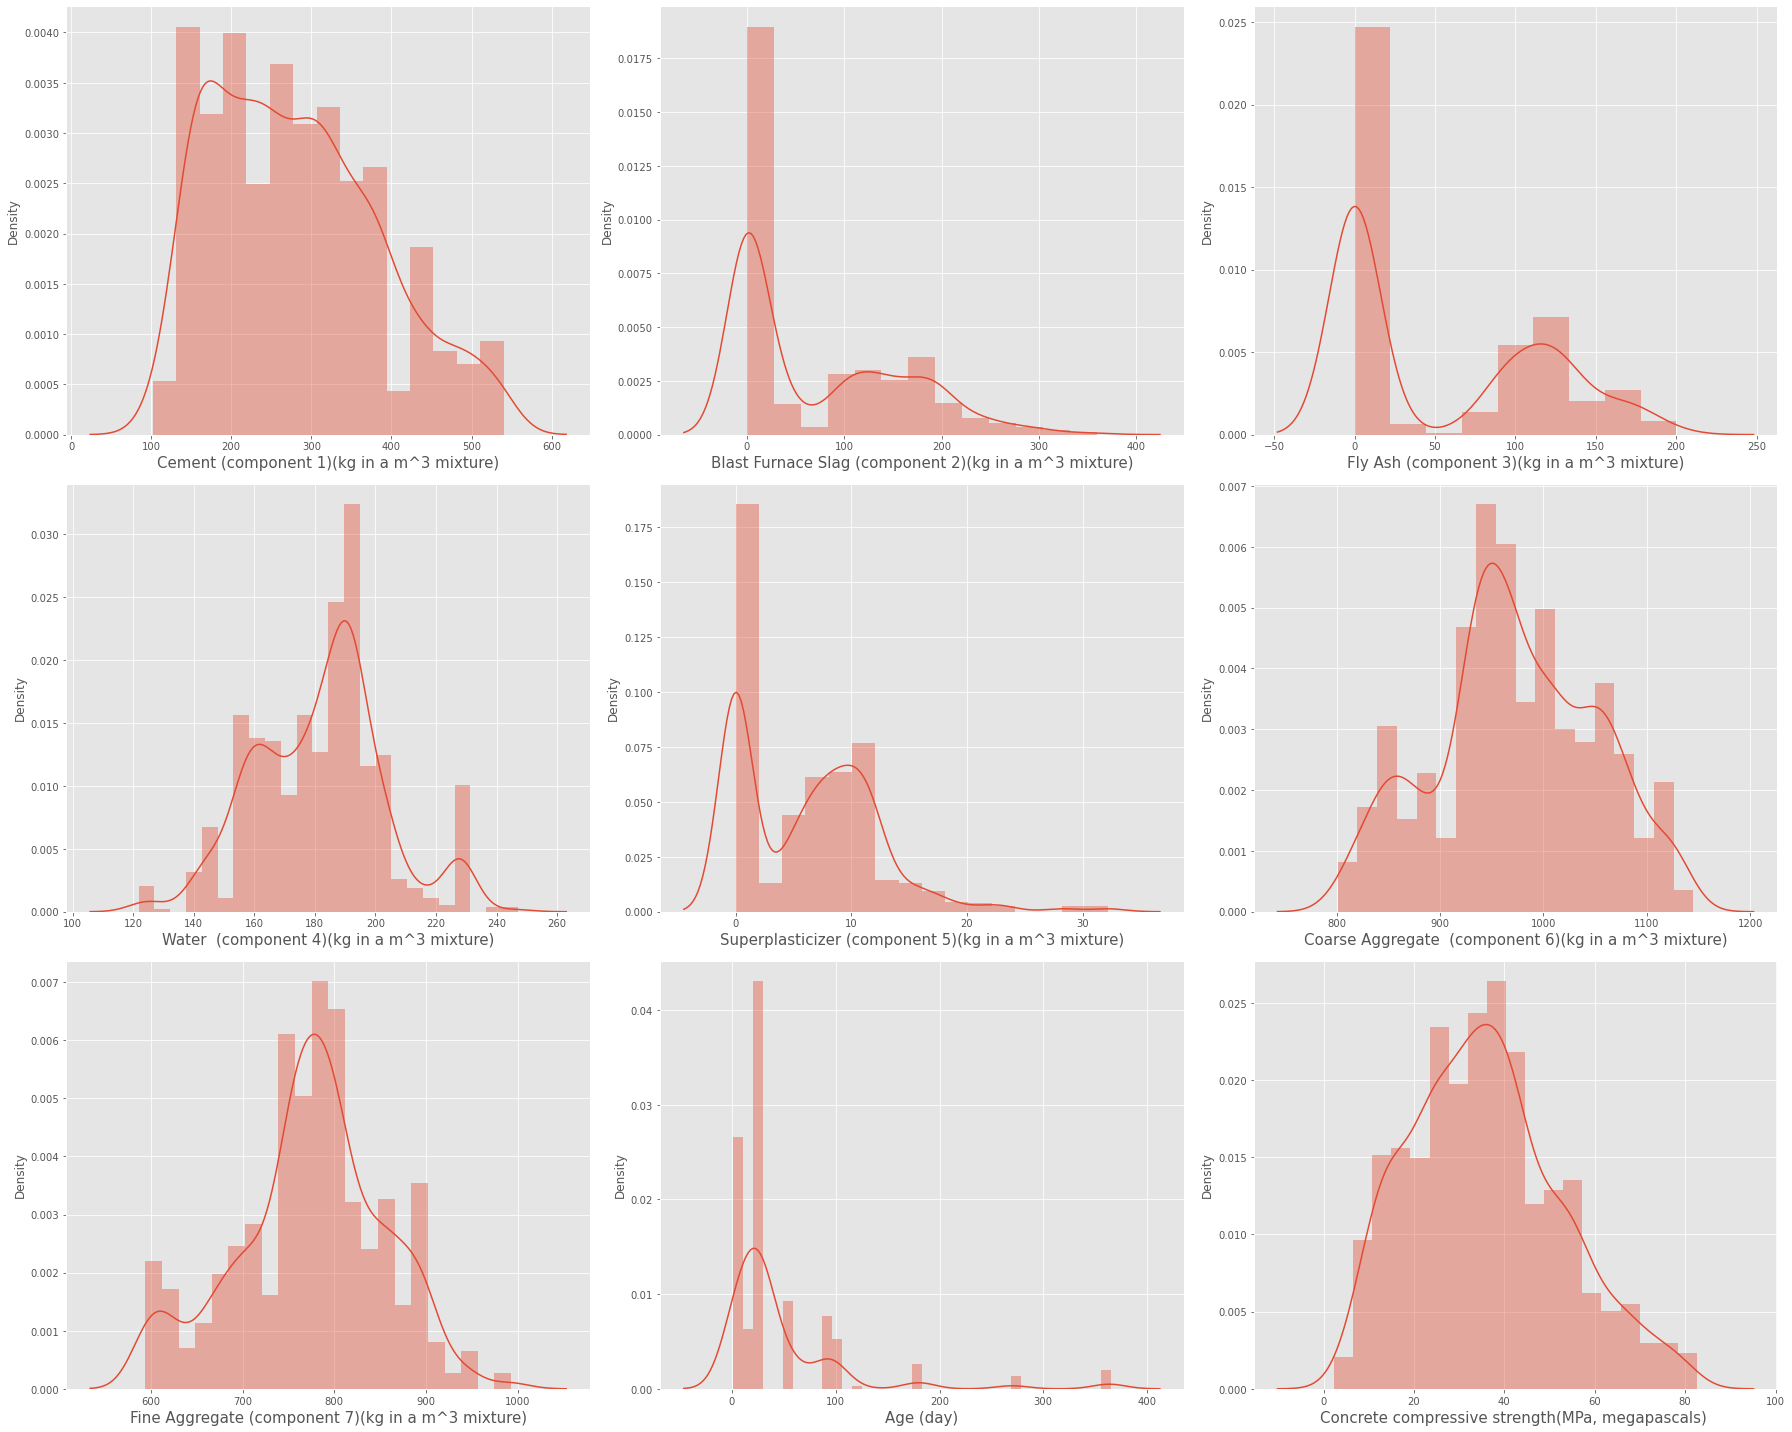

In [107]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in dataset.columns:
    print(col)
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(dataset[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [123]:
# creating a feature and label
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
pd.DataFrame(y) 
 

,"Concrete compressive strength(MPa, megapascals)"
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
5,47.03
6,43.70
7,36.45
8,45.85
9,39.29


In [129]:
# Normalizing values 
for i in X.columns:
    X[i] += 1
    X[i] = np.log(X[i])
    print(i)
pd.DataFrame(X)

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1.094345,0.423036,0.423036,1.032568,0.651241,1.122665,1.104413,0.909015
1,1.094345,0.423036,0.423036,1.032568,0.651241,1.123250,1.104413,0.909015
2,1.071165,1.025072,0.423036,1.051601,0.423036,1.118144,1.098666,1.060546
3,1.071165,1.025072,0.423036,1.051601,0.423036,1.118144,1.098666,1.075786
4,1.044071,1.020684,0.423036,1.042195,0.423036,1.120158,1.113044,1.075108
5,1.059769,1.011537,0.423036,1.051601,0.423036,1.118144,1.104021,0.996469
6,1.077757,0.999985,0.423036,1.051601,0.423036,1.118144,1.098666,1.075786
7,1.077757,0.999985,0.423036,1.051601,0.423036,1.118144,1.098666,0.909015
8,1.059769,1.011537,0.423036,1.051601,0.423036,1.118144,1.104021,0.909015
9,1.088414,0.423036,0.423036,1.051601,0.423036,1.118144,1.098666,0.909015


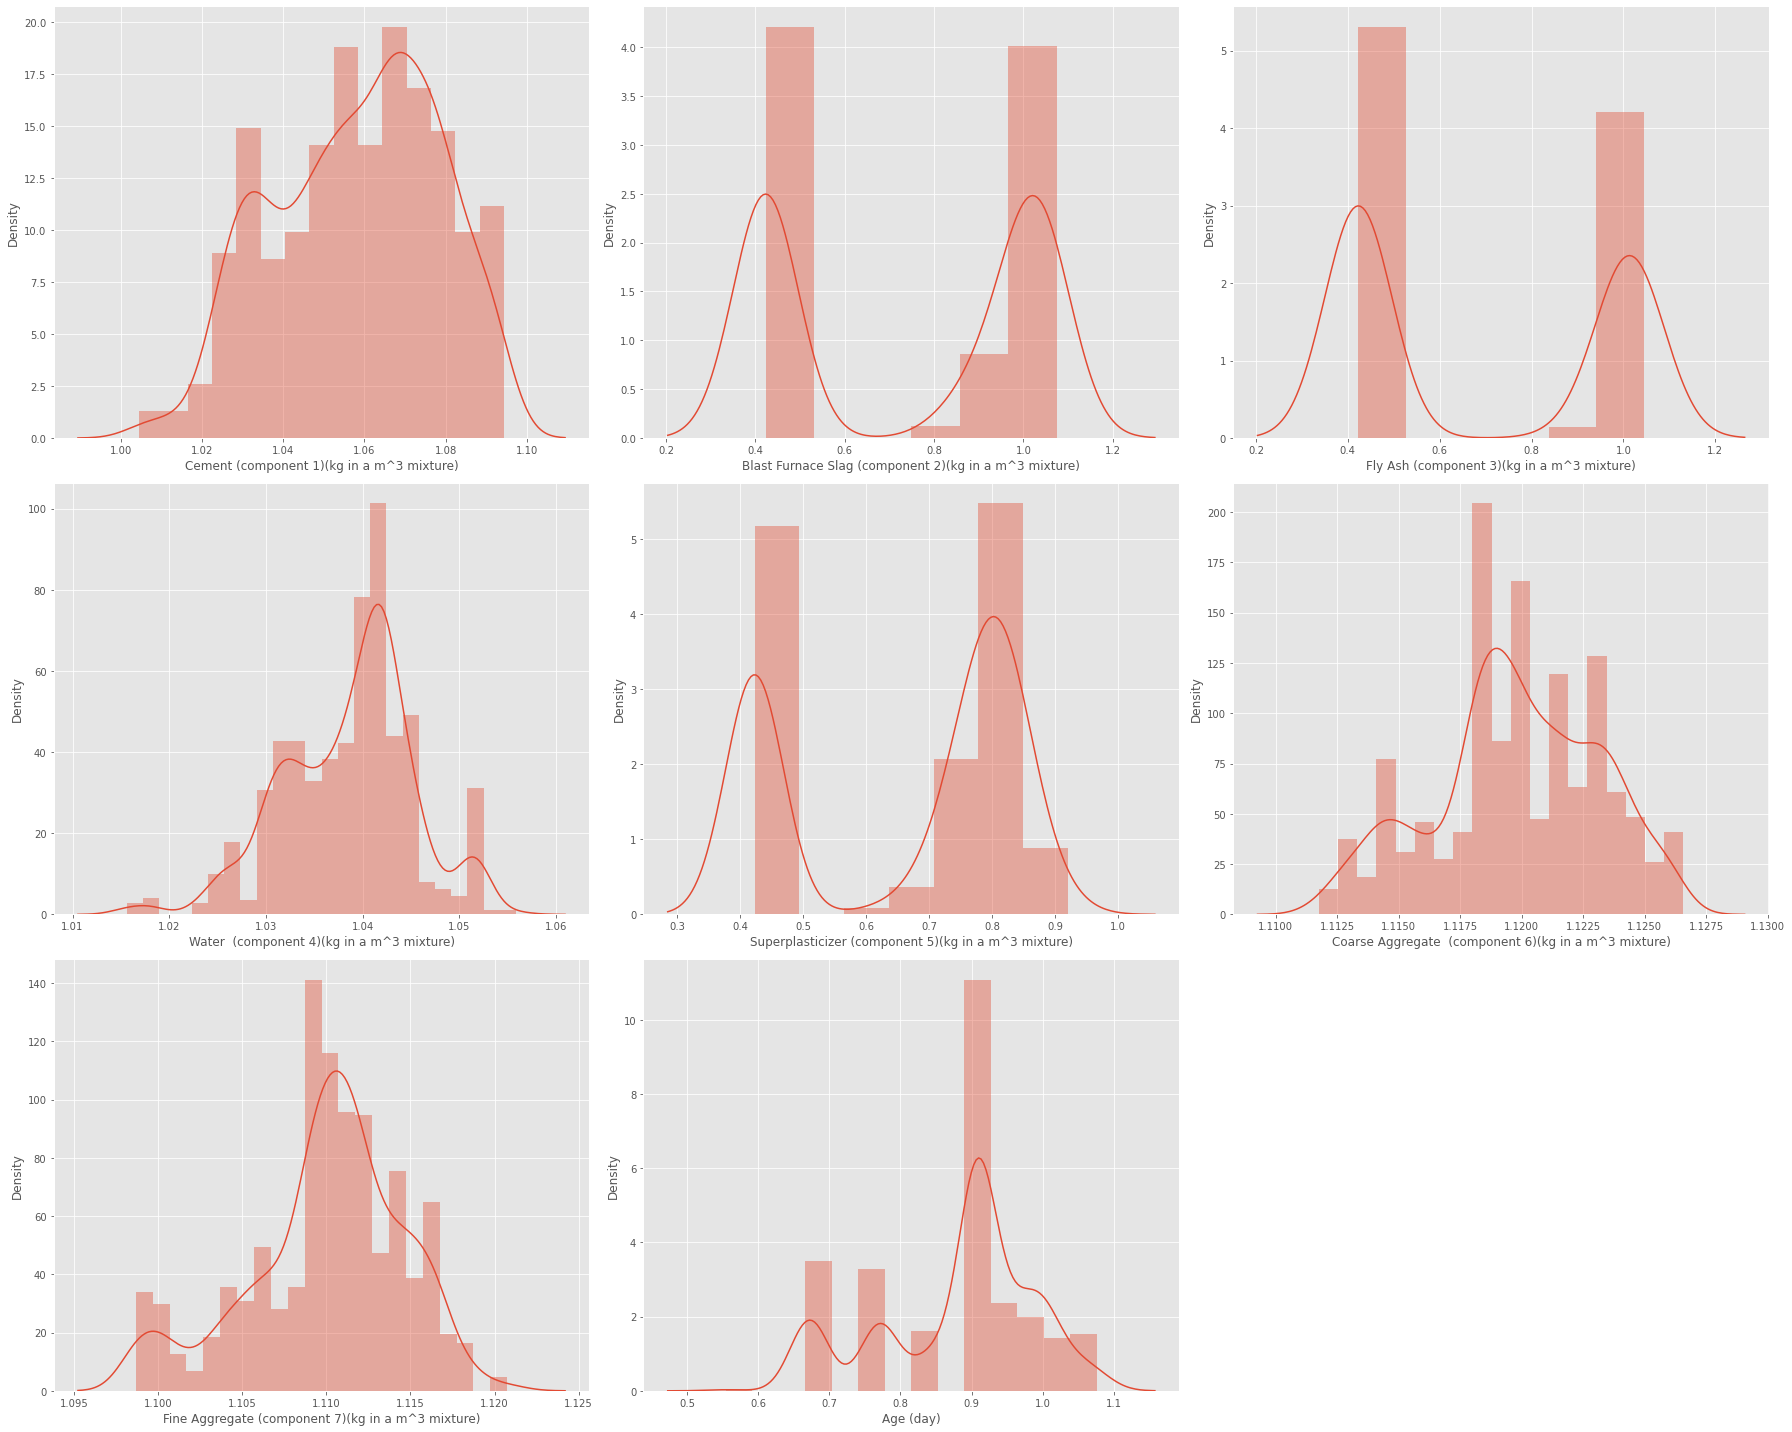

In [140]:
plt.figure(figsize=(25,20))
plot_number = 1
for i in X.columns:
    if plot_number <= 8:
        ax = plt.subplot(3,3, plot_number)
        sns.distplot(X[i])
    plot_number += 1
    
plt.tight_layout()
plt.show()

AxesSubplot(0.125,0.657941;0.227941x0.222059)
AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AxesSubplot(0.125,0.391471;0.227941x0.222059)
AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AxesSubplot(0.672059,0.391471;0.227941x0.222059)
AxesSubplot(0.125,0.125;0.227941x0.222059)
AxesSubplot(0.398529,0.125;0.227941x0.222059)


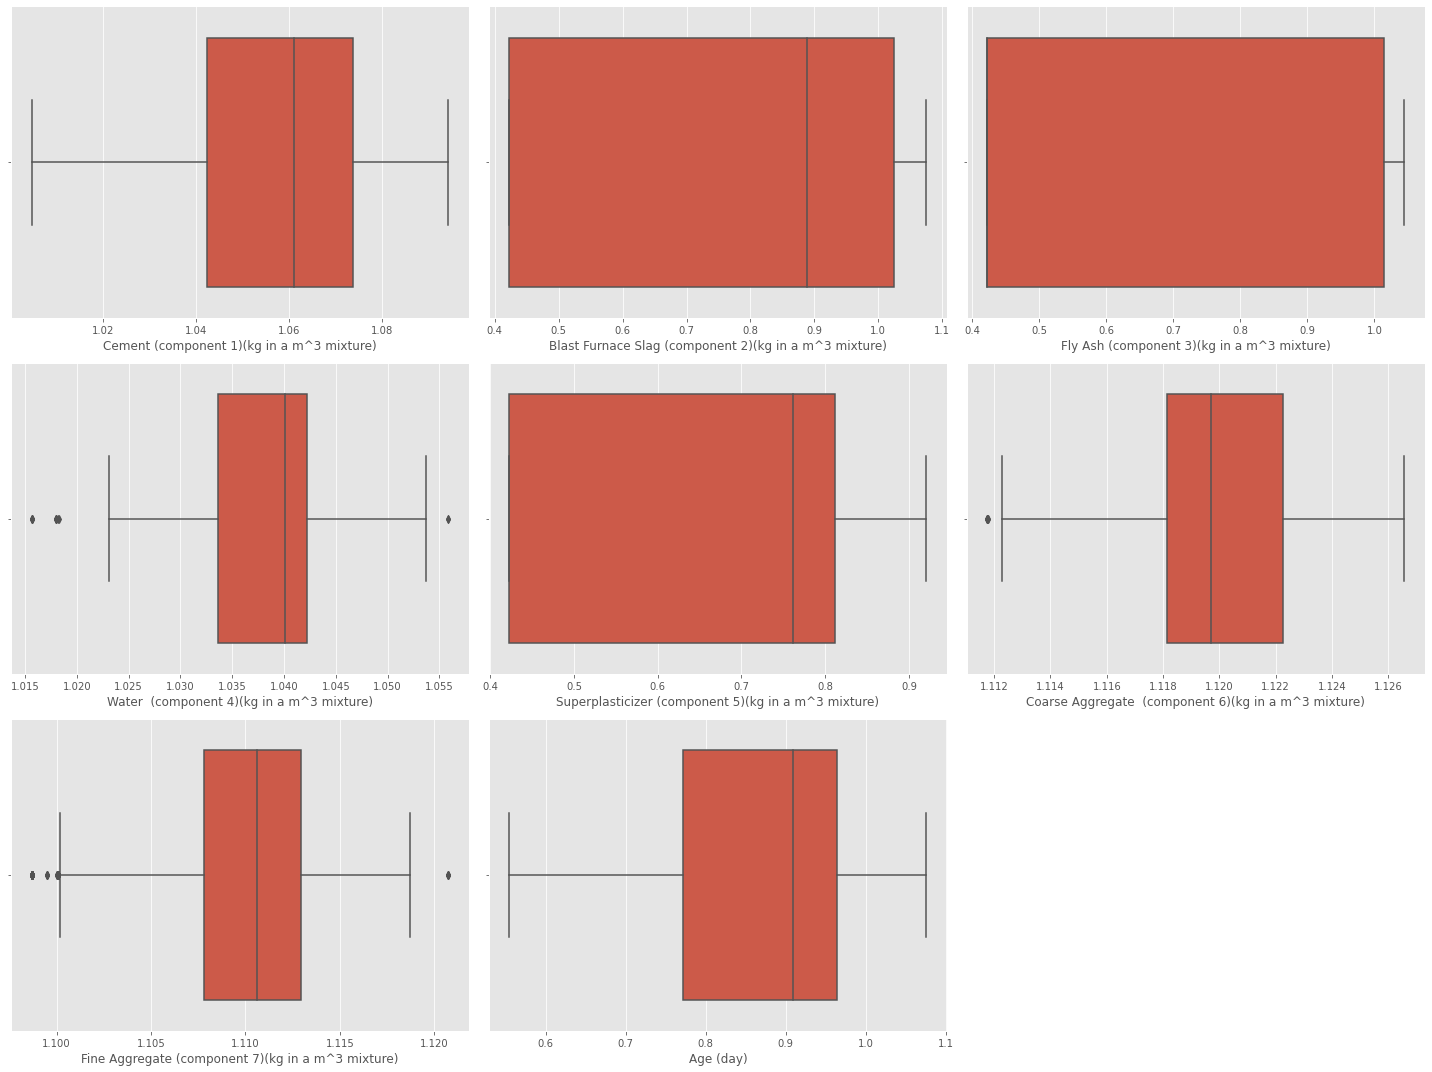

In [150]:
plt.figure(figsize=(20,15))
plot_number = 1
for i in X.columns:
    if plot_number <=8:
        ax = plt.subplot(3,3,plot_number)
        print(ax)
        sns.boxplot(X[i])
    plot_number += 1
plt.tight_layout()
plt.show()

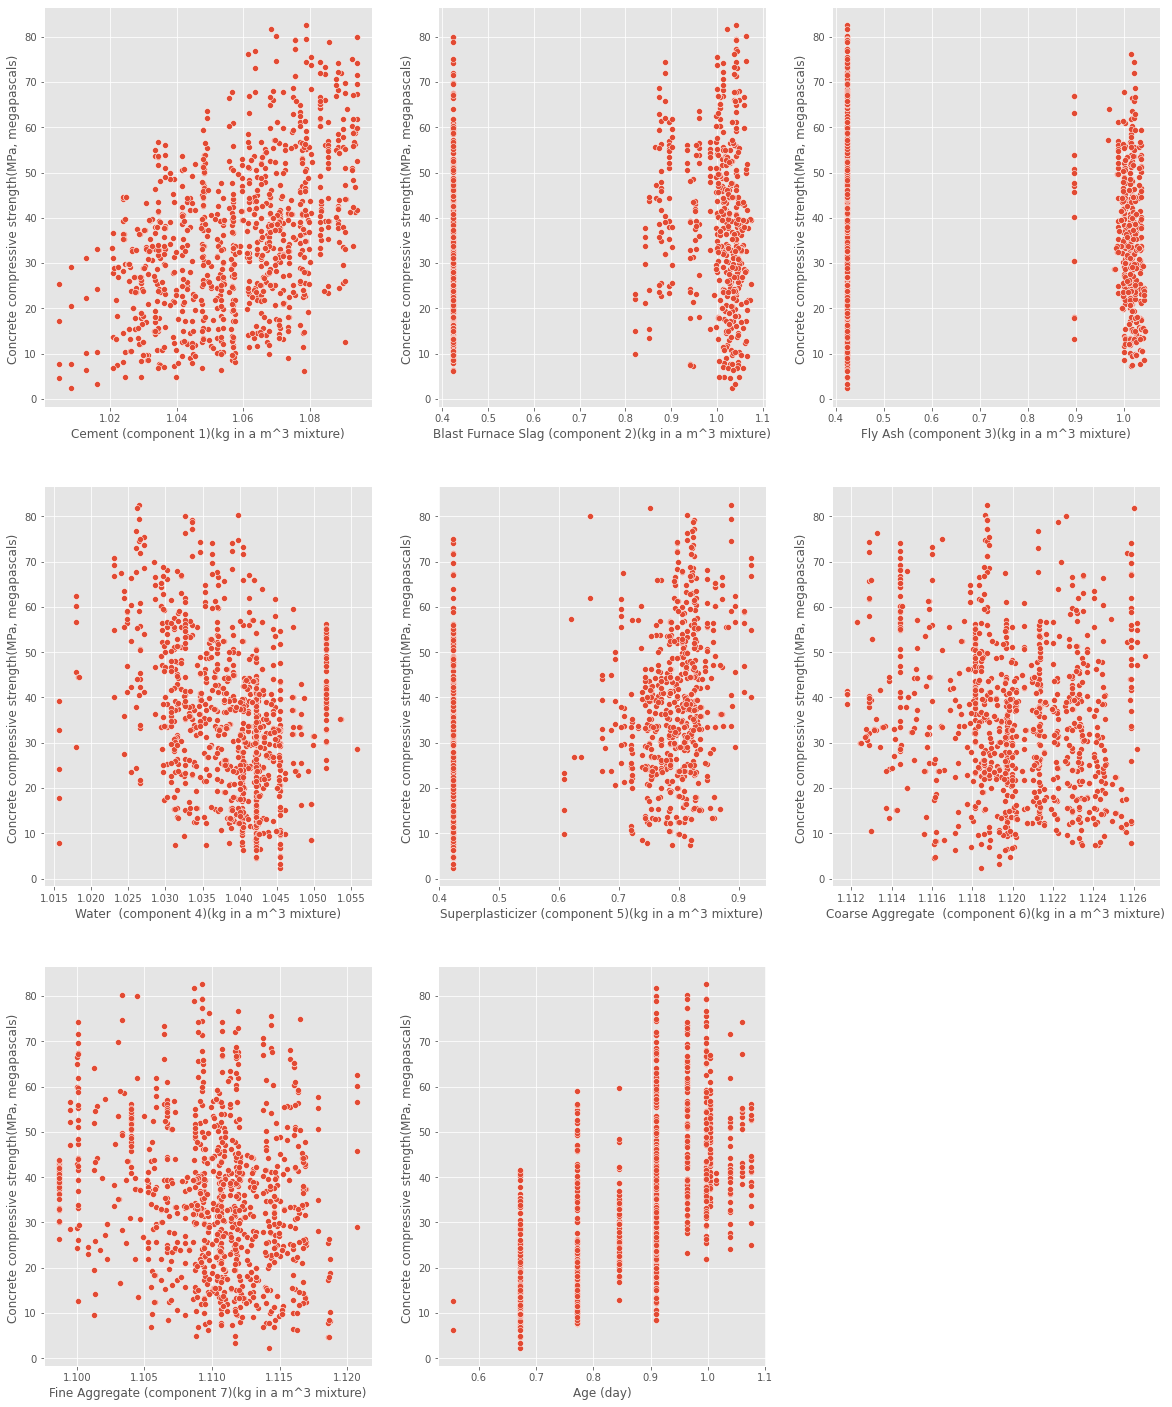

In [169]:
# comparing x values with target value 
plt.figure(figsize=(20,25))
plot_number = 1
for i in X.columns:
    if plot_number <= 8:
        ax = plt.subplot(3,3,plot_number)
        sns.scatterplot(X[i],y)
    plot_number += 1
plot.show()

In [156]:
# spliting data in training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [157]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [158]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [159]:
lr.score(X_train, y_train)

0.8027472217669885

In [160]:
lr.score(X_test, y_test)

0.8059186846379882

In [164]:
# using decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [165]:
dtr.score(X_train,y_train)

0.9962623501831478

In [166]:
dtr.score(X_test,y_test)

0.8886982995409327

ValueError: Could not interpret value `Concrete compressive strength(MPa, megapascals) ` for parameter `y`

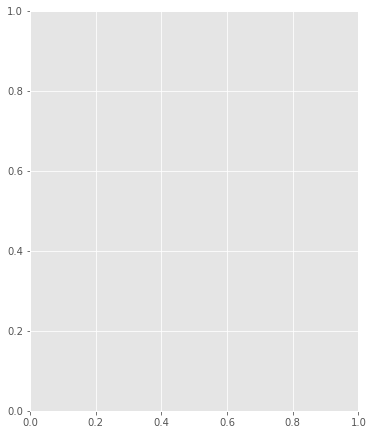

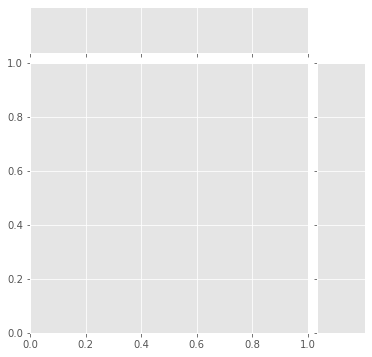

In [173]:
# comparing x values with target value 
plt.figure(figsize=(20,25))
plot_number = 1
for i in X.columns:
    if plot_number <= 8:
        ax = plt.subplot(3,3,plot_number)
        sns.jointplot(X[i],y='Concrete compressive strength(MPa, megapascals) ',kind='kde')
    plot_number += 1
plot.show()